# Importing Libraries


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Reading CSV File

In [2]:
dataset = pd.read_csv(r'C:\Users\Mridul\Desktop\haberman.csv')

# Dataset Print

In [3]:
print(dataset)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]


# Print the number of datapoints and features.

In [4]:
dataset.shape

(305, 4)

# Add columns name to the dataset and recheck the columns names.

In [5]:
dataset.columns = ["Age","Op_Year","Axil_Nodes","Survival_Status"]
print(dataset.columns)

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')


# Checking first few values of the dataset

In [6]:
dataset.head()

,Age,Op_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Checking unique values/variability of every columns altogether


In [7]:
dataset.nunique()

Age                49
Op_Year            12
Axil_Nodes         31
Survival_Status     2
dtype: int64

# Checking type of variable in the data set


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Op_Year          305 non-null    int64
 2   Axil_Nodes       305 non-null    int64
 3   Survival_Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


We can see that no feature has missing value and there is no categorical value.

# Deleteing unecessary features

In [9]:
# Using  del dataset['Column_name']

# Check for missing values

In [10]:
dataset.isnull().sum()

Age                0
Op_Year            0
Axil_Nodes         0
Survival_Status    0
dtype: int64

# Filling missing data

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(dataset)

array([[30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       [31., 59.,  2.,  1.],
       ...,
       [77., 65.,  3.,  1.],
       [78., 65.,  1.,  2.],
       [83., 58.,  2.,  2.]])

# Dataset description

In [12]:
dataset.describe()

,Age,Op_Year,Axil_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


We can observe that <br>
1) 75% of people who were diagnosed were of age less than 61. <br>
2) 75% people had less than 4 axil nodes

# Datapoint per class

In [13]:
dataset["Survival_Status"] = dataset["Survival_Status"].apply(lambda x: "Survived" if x == 1 else "Died")
dataset["Survival_Status"].value_counts()

Survived    224
Died         81
Name: Survival_Status, dtype: int64

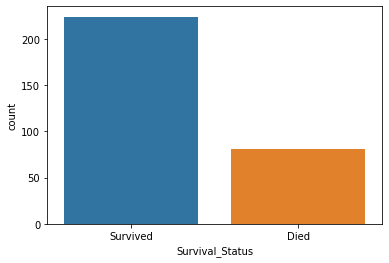

In [14]:
sns.countplot(dataset['Survival_Status'])

This shows that it is a case of imbalance dataset as number of people who survived is far greater than those who did not

# Encoding categorical data ( Independent Variable)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [index of categorical data])], remainder='passthrough')
#dataset = np.array(ct.fit_transform(dataset))

# Encoding categorical data ( Dependent Variable)

In [16]:
dataset.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Survival_Status'] = le.fit_transform(dataset['Survival_Status'])
dataset.head()

,Age,Op_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# Checking Survival Status by a feature value

In [17]:
dataset[['Axil_Nodes','Survival_Status']].groupby(['Axil_Nodes']).mean().sort_values(by='Survival_Status',ascending=True)

,Survival_Status
Axil_Nodes,
52,0.000000
35,0.000000
24,0.000000
23,0.000000
21,0.000000
17,0.000000
13,0.200000
11,0.250000
19,0.333333


# Mean, Median, Percentile, IQR & MAD

## Mean and Median

In [18]:
Survived = dataset.loc[dataset.Survival_Status == 1]
Dead = dataset.loc[dataset.Survival_Status == 0]

for i in Survived:
    print("\nMedian of",i,)
    print("Value is= ",np.median(Survived[i]))
    print("\nMean of",i,)
    print("Value is= ",np.mean(Survived[i]))

for i in Dead:
    print("\nMedian of",i,)
    print("Value is= ",np.median(Dead[i]))
    print("\nMean of",i,)
    print("Value is= ",np.mean(Dead[i]))


Median of Age
Value is=  52.0

Mean of Age
Value is=  52.11607142857143

Median of Op_Year
Value is=  63.0

Mean of Op_Year
Value is=  62.857142857142854

Median of Axil_Nodes
Value is=  0.0

Mean of Axil_Nodes
Value is=  2.799107142857143

Median of Survival_Status
Value is=  1.0

Mean of Survival_Status
Value is=  1.0

Median of Age
Value is=  53.0

Mean of Age
Value is=  53.67901234567901

Median of Op_Year
Value is=  63.0

Mean of Op_Year
Value is=  62.82716049382716

Median of Axil_Nodes
Value is=  4.0

Mean of Axil_Nodes
Value is=  7.45679012345679

Median of Survival_Status
Value is=  0.0

Mean of Survival_Status
Value is=  0.0


As mean and median values are similiar no skew data is found in dataset

## Standard Deviation and MAD

In [19]:
from statsmodels import robust
for i in Survived:
    print("\nStandard Deviation of",i,)
    print("Value is= ",np.std(Survived[i]))
    print("\nMean Absolute Deviation of",i)
    print("Value is= ",robust.mad(Survived[i]))
    
for i in Dead:
    print("\nStandard Deviation of",i,)
    print("Value is= ",np.std(Dead[i]))
    print("\nMean Absolute Deviation of",i)
    print("Value is= ",robust.mad(Dead[i])) 


Standard Deviation of Age
Value is=  10.913004640364269

Mean Absolute Deviation of Age
Value is=  13.343419966550417

Standard Deviation of Op_Year
Value is=  3.2220145175061514

Mean Absolute Deviation of Op_Year
Value is=  4.447806655516806

Standard Deviation of Axil_Nodes
Value is=  5.869092706952767

Mean Absolute Deviation of Axil_Nodes
Value is=  0.0

Standard Deviation of Survival_Status
Value is=  0.0

Mean Absolute Deviation of Survival_Status
Value is=  0.0

Standard Deviation of Age
Value is=  10.10418219303131

Mean Absolute Deviation of Age
Value is=  11.860817748044816

Standard Deviation of Op_Year
Value is=  3.3214236255207883

Mean Absolute Deviation of Op_Year
Value is=  4.447806655516806

Standard Deviation of Axil_Nodes
Value is=  9.128776076761632

Mean Absolute Deviation of Axil_Nodes
Value is=  5.930408874022408

Standard Deviation of Survival_Status
Value is=  0.0

Mean Absolute Deviation of Survival_Status
Value is=  0.0


For axil_nodes MAD is better evaluation method

## Percentile and IQR

In [20]:
for i in Survived:
    print("\nQuantiles of:",i)
    print(np.percentile(Survived[i],np.arange(0, 100, 25)))
    print("IQR of:",i)
    print(np.percentile(Survived[i],75)-np.percentile(Survived[i],25))
    


Quantiles of: Age
[30. 43. 52. 60.]
IQR of: Age
17.0

Quantiles of: Op_Year
[58. 60. 63. 66.]
IQR of: Op_Year
6.0

Quantiles of: Axil_Nodes
[0. 0. 0. 3.]
IQR of: Axil_Nodes
3.0

Quantiles of: Survival_Status
[1. 1. 1. 1.]
IQR of: Survival_Status
0.0


In [21]:
for i in Dead:
    print("\nQuantiles of:",i)
    print(np.percentile(Dead[i],np.arange(0, 100, 25)))
    print("IQR of:",i)
    print(np.percentile(Dead[i],75)-np.percentile(Dead[i],25))
    


Quantiles of: Age
[34. 46. 53. 61.]
IQR of: Age
15.0

Quantiles of: Op_Year
[58. 59. 63. 65.]
IQR of: Op_Year
6.0

Quantiles of: Axil_Nodes
[ 0.  1.  4. 11.]
IQR of: Axil_Nodes
10.0

Quantiles of: Survival_Status
[0. 0. 0. 0.]
IQR of: Survival_Status
0.0


These IQR values can be used to find outliers in data <br>
eg. Age : Outliers are either less than Q1 - 1.5 IQR ie 23.5 or greater thnan Q3 + 1.5 IQR ie. 83.5

# Univariate Analysis 

## Histogram

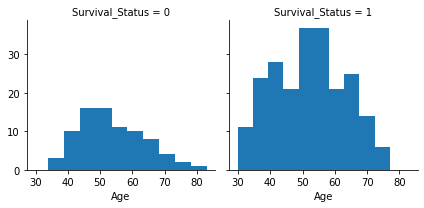

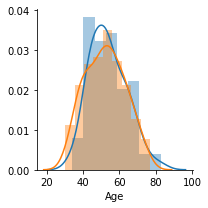

In [22]:
Age_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
Age_Grid.map(plt.hist,"Age",bins = 10)

Age_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
Age_Grid.map(sns.distplot,"Age" , rug = False , kde = True , hist = True)

Observing the histogram we can see that large majority of people who survived belong to age group 50 - 60


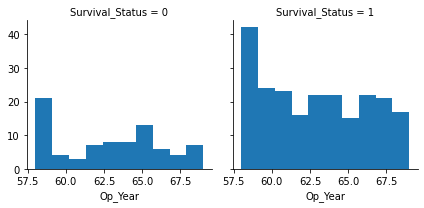

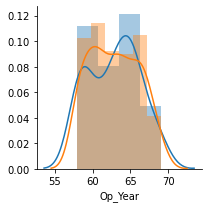

In [23]:
Op_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
Op_Grid.map(plt.hist,"Op_Year",bins = 10)


Op_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
Op_Grid.map(sns.distplot,"Op_Year" , rug = False , kde = True , hist = True)

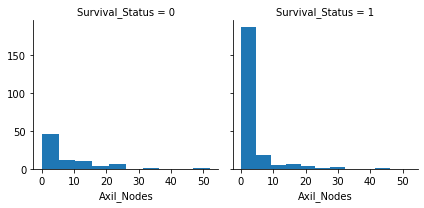

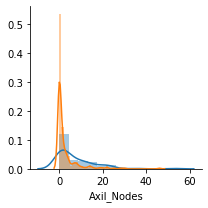

In [24]:
axil_Grid = sns.FacetGrid(dataset ,col = 'Survival_Status')
axil_Grid.map(plt.hist,"Axil_Nodes",bins = 10)


axil_Grid = sns.FacetGrid(dataset,hue = 'Survival_Status')
axil_Grid.map(sns.distplot,"Axil_Nodes" , rug = False , kde = True , hist = True)

Patients having axial nodes greater than 10 have very less survival rate.<br>
Although the probability curves are pretty overlap we can observe that <br>
1) People between age 45 - 55 have high chances of survival <br>
2) People having axil nodes < 5 have great chances of survival <br>

## PDF and CDF 

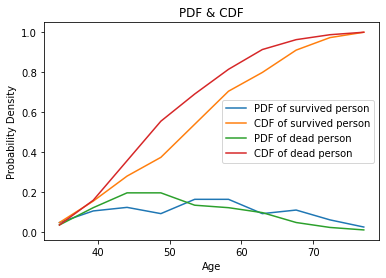

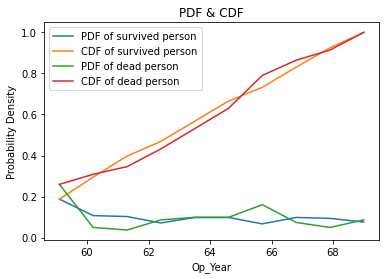

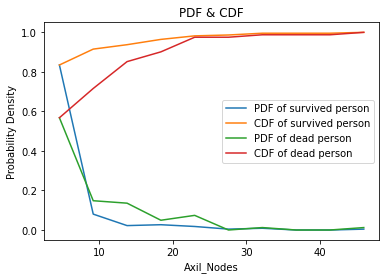

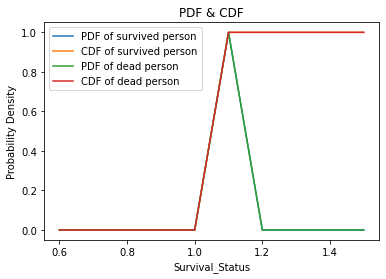

In [25]:
for i in dataset:
    count, bin_edges= np.histogram(Survived[i])
    count2,bin_edges2=np.histogram(Dead[i])
    pdf_surv=count/sum(count)
    cdf_surv=np.cumsum(pdf_surv)
    pdf_dead=count2/sum(count2)
    cdf_dead=np.cumsum(pdf_dead)

    plt.title("PDF & CDF")
    plt.xlabel(i)
    plt.ylabel("Probability Density")
    plt.plot(bin_edges[1:],pdf_surv,label="PDF of survived person")
    plt.plot(bin_edges[1:],cdf_surv,label="CDF of survived person")
    plt.plot(bin_edges[1:],pdf_dead,label="PDF of dead person")
    plt.plot(bin_edges[1:],cdf_dead,label="CDF of dead person")

    plt.legend(loc="best")
    plt.show()
    

Observations: <br>
1)90% of people diagnosed are below 65 <br>
2)50% of operations were held between year 1963 and 1966

## Box Plot

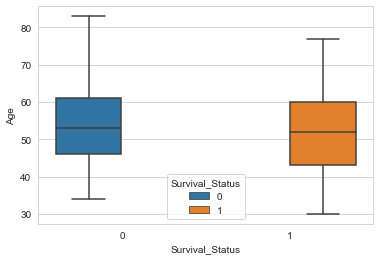

In [26]:
sns.set_style("whitegrid")
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Age'] , hue = dataset['Survival_Status'] )

1.Patients having age greater than 85 haven't survived <br>
2.Patients having age lesser than 35 survived

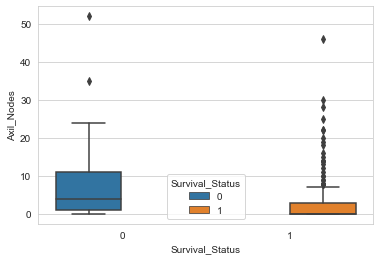

In [27]:
sns.set_style("whitegrid")
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Axil_Nodes'] , hue = dataset['Survival_Status'])

Outliers are spotted.<br>
People have greater than 6 nodes have less chances of survival


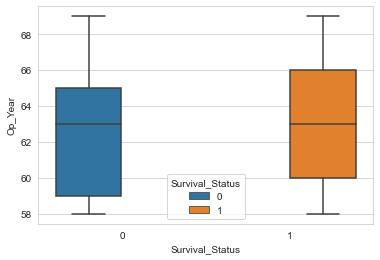

In [28]:
sns.set_style("whitegrid")
sns.boxplot(x = dataset['Survival_Status'] , y = dataset['Op_Year'] , hue = dataset['Survival_Status'])

Major overlapping in data

## Violin Plot

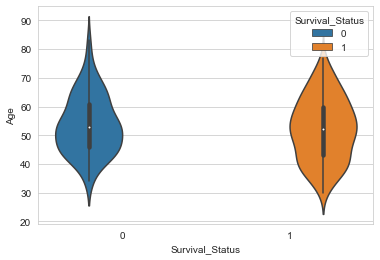

In [29]:
sns.set_style("whitegrid")
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Age'] ,hue = dataset['Survival_Status'] )

Very few people having age greater than 75 have survived

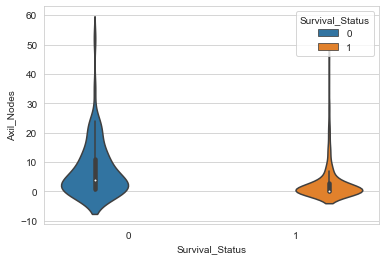

In [30]:
sns.set_style("whitegrid")
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Axil_Nodes'] ,hue = dataset['Survival_Status'])

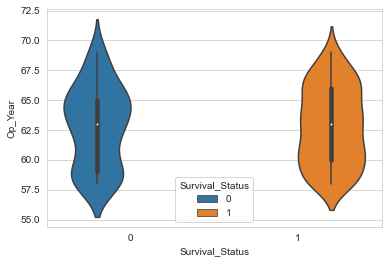

In [31]:
sns.set_style("whitegrid")
sns.violinplot(x = dataset['Survival_Status'] , y = dataset['Op_Year'] ,hue = dataset['Survival_Status'])

# BiVariate Analysis

## Pair Plot

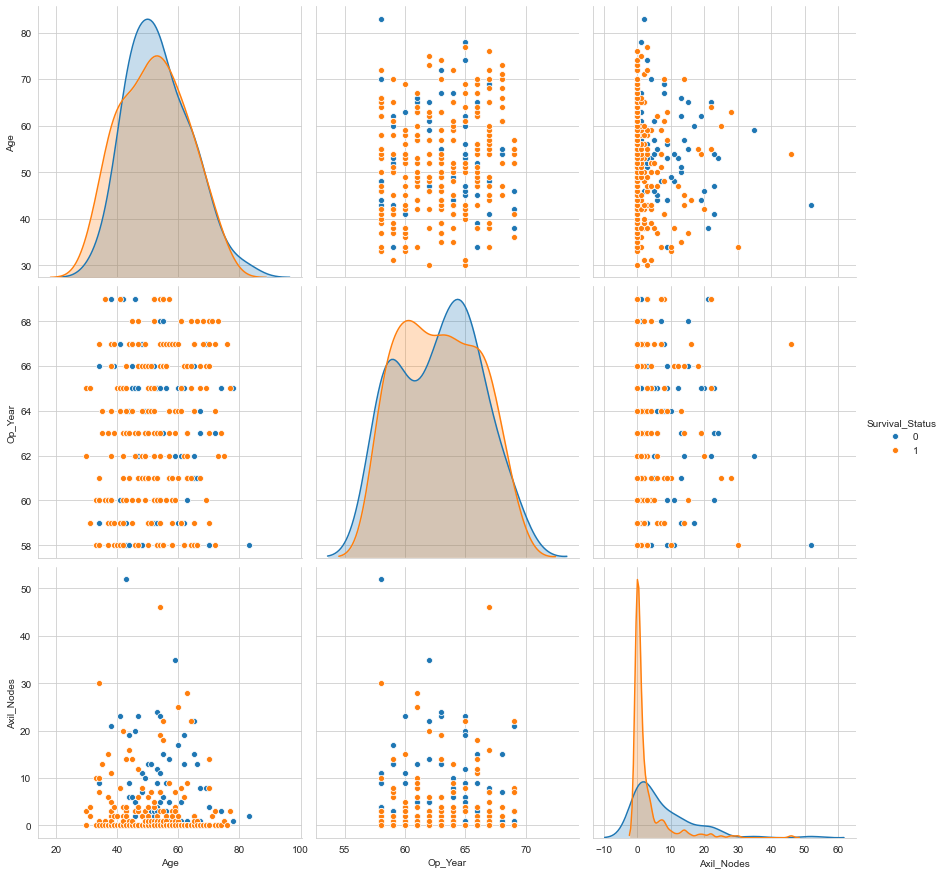

In [32]:
sns.set_style("whitegrid")
sns.pairplot(data = dataset , hue = 'Survival_Status',height = 4)


The data are highly mixed up, none of the variable-pairs can help us find linearly separable clusters hence we can't find "lines" and "if-else" conditions to build a simple model to classify the survive status of the patient.

## HeatMap 

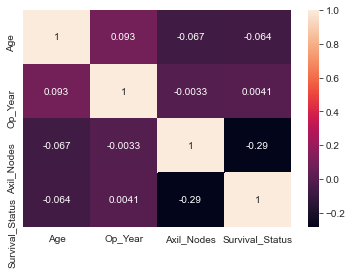

In [33]:
sns.heatmap(dataset.corr(),annot = True)

Used to find any correlation betweeen data. No special correlation found.

## Contour Plots

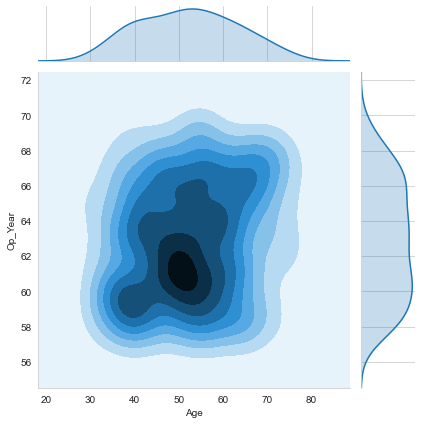

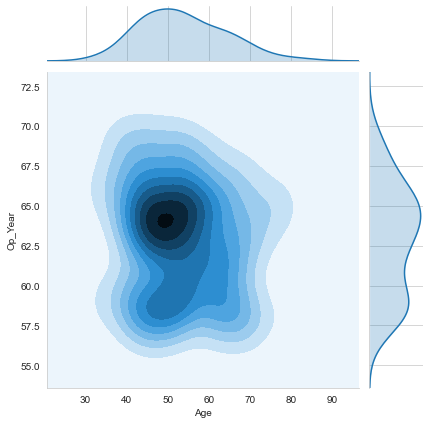

In [34]:
sns.jointplot(x = 'Age' , y = 'Op_Year' , data = Survived , kind = 'kde')
sns.jointplot(x = 'Age' , y = 'Op_Year' , data = Dead , kind = 'kde')


1) Among survivors maximum people are those who have age between 47 and 53 and operation year between 1960-62